# Setup

In [1]:
import os
from glob import glob
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib import colors

import seaborn as sns
sns.set_style('whitegrid')

# Read Data

In [2]:
cols = ["P2O5", "K", "Mg", "pH"]

In [3]:
# read predictions and true data for trainingdata
path = '../../hyperview/random_forest/evaluation'
# idx all
y_hat_bls = np.load(os.path.join(path, "y_hat_bls_RandomForest_202205021710_nest=728_maxd=None_minsl=1.npy"))
y_hat_rfs = np.load(os.path.join(path, "y_hat_rfs_RandomForest_202205021710_nest=728_maxd=None_minsl=1.npy"))
y_vs = np.load(os.path.join(path, "y_vs_RandomForest_202205021710_nest=728_maxd=None_minsl=1.npy"))

In [4]:
print(f"y_hat_bls shape {y_hat_bls.shape}")
print(f"y_hat_rfs shape {y_hat_rfs.shape}")
print(f"y_vs shape {y_vs.shape}")

y_hat_bls shape (346400, 4)
y_hat_rfs shape (346400, 4)
y_vs shape (346400, 4)


## Plots: Real -vs Prediction

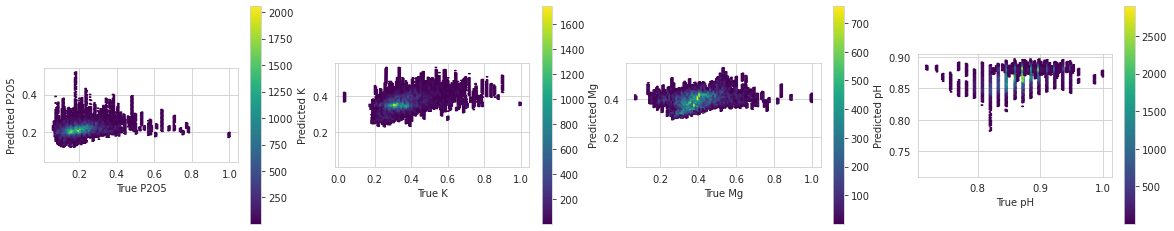

In [5]:
fig, axs = plt.subplots(1, 4, figsize=(20, 4))

for i, ax in enumerate(axs):
    ax.set_aspect('equal')

    img = ax.hexbin(y_vs[:, i], y_hat_rfs[:, i], cmap='viridis', mincnt=1)

    ax.plot(np.arange(np.min(y_vs[:, i]), np.max(y_vs[:, i])),
            np.arange(np.min(y_vs[:, i]), np.max(y_vs[:, i])), 'r--')

    plt.colorbar(img, ax=ax)

    ax.set_xlabel('True ' + cols[i])
    ax.set_ylabel('Predicted ' + cols[i])

## Plots: Real - vs Baseline

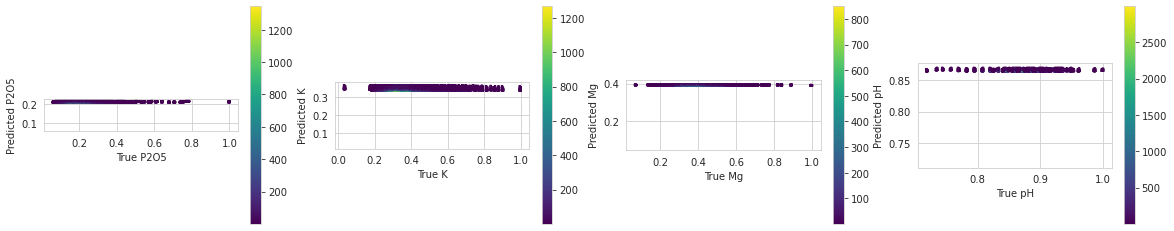

In [6]:
fig, axs = plt.subplots(1, 4, figsize=(20, 4))

for i, ax in enumerate(axs):
    ax.set_aspect('equal')

    img = ax.hexbin(y_vs[:, i], y_hat_bls[:, i], cmap='viridis', mincnt=1)

    ax.plot(np.arange(np.min(y_vs[:, i]), np.max(y_vs[:, i])),
            np.arange(np.min(y_vs[:, i]), np.max(y_vs[:, i])), 'r--')

    plt.colorbar(img, ax=ax)

    ax.set_xlabel('True ' + cols[i])
    ax.set_ylabel('Predicted ' + cols[i])

## Prediction of 4 parameters separtely

In [26]:
y_hat_bls_s = []
y_hat_rfs_s = []
y_vs_s = []

In [32]:
# idx 0
#name_bl_ix0 = "y_hat_bls_RandomForest_202205031318_nest=901_maxd=None_minsl=10.npy"
#name_rf_ix0 = "y_hat_rfs_RandomForest_202205031318_nest=901_maxd=None_minsl=10.npy"
#name_v_ix0 = "y_vs_RandomForest_202205031318_nest=901_maxd=None_minsl=10.npy"

name_bl_ix0 = "y_hat_bls_XGB_202205172256_nest=977_maxd=Noneeta=0.004479022461645764gamma=0.08433258895627904alpha=0.006492449700871317mincw=50.npy"
name_rf_ix0 = "y_hat_rfs_XGB_202205172256_nest=977_maxd=Noneeta=0.004479022461645764gamma=0.08433258895627904alpha=0.006492449700871317mincw=50.npy"
name_v_ix0 = "y_vs_XGB_202205172256_nest=977_maxd=Noneeta=0.004479022461645764gamma=0.08433258895627904alpha=0.006492449700871317mincw=50.npy"

name_bl_ix0 = "y_hat_bls_XGB_202205180738_nest=1186_maxd=Noneeta=0.02032264825651927gamma=0.045560291878015434alpha=0.575742374121663mincw=50.npy"
name_rf_ix0 = "y_hat_rfs_XGB_202205180738_nest=1186_maxd=Noneeta=0.02032264825651927gamma=0.045560291878015434alpha=0.575742374121663mincw=50.npy"
name_v_ix0 = "y_vs_XGB_202205180738_nest=1186_maxd=Noneeta=0.02032264825651927gamma=0.045560291878015434alpha=0.575742374121663mincw=50.npy"

name_bl_ix0 = "y_hat_bls_XGB_202205181535_nest=1200_maxd=Noneeta=0.010529873055816506gamma=0.05240111279014291alpha=0.5996317700513023mincw=50.npy"
name_rf_ix0 = "y_hat_rfs_XGB_202205181535_nest=1200_maxd=Noneeta=0.010529873055816506gamma=0.05240111279014291alpha=0.5996317700513023mincw=50.npy"
name_v_ix0 = "y_vs_XGB_202205181535_nest=1200_maxd=Noneeta=0.010529873055816506gamma=0.05240111279014291alpha=0.5996317700513023mincw=50.npy"

y_hat_bls_s.append(np.load(os.path.join(path, name_rf_ix0)))
y_hat_rfs_s.append(np.load(os.path.join(path, name_bl_ix0)))
y_vs_s.append(np.load(os.path.join(path, name_v_ix0)))

In [33]:
y_vs_s[0].shape, y_hat_bls_s[0].shape, y_hat_rfs_s[0].shape

((866000, 1), (866000,), (866000, 1))

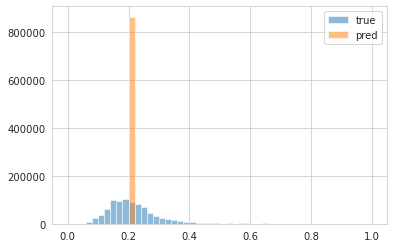

In [34]:
frequency, bins = np.histogram(y_vs_s[0], bins=50, range=[0, 1])
plt.hist(y_vs_s[0], alpha=0.5, bins=bins, label='true')
plt.hist(y_hat_rfs_s[0], alpha=0.5, bins=bins, label='pred')
plt.legend()

In [22]:
# idx 1
name_bl_ix1 = "y_hat_bls_RandomForest_202205022017_nest=1081_maxd=None_minsl=5.npy"
name_rf_ix1 = "y_hat_rfs_RandomForest_202205022017_nest=1081_maxd=None_minsl=5.npy"
name_v_ix1 = "y_vs_RandomForest_202205022017_nest=1081_maxd=None_minsl=5.npy"

name_bl_ix1 = "y_hat_bls_XGB_202205171930_nest=1117_maxd=Noneeta=0.03118616043400089gamma=0.0040393442019673945alpha=0.026391135212343833mincw=1.npy"
name_rf_ix1 = "y_hat_rfs_XGB_202205171930_nest=1117_maxd=Noneeta=0.03118616043400089gamma=0.0040393442019673945alpha=0.026391135212343833mincw=1.npy"
name_v_ix1 = "y_vs_XGB_202205171930_nest=1117_maxd=Noneeta=0.03118616043400089gamma=0.0040393442019673945alpha=0.026391135212343833mincw=1.npy"

y_hat_bls_s.append(np.load(os.path.join(path, name_rf_ix1)))
y_hat_rfs_s.append(np.load(os.path.join(path, name_bl_ix1)))
y_vs_s.append(np.load(os.path.join(path, name_v_ix1)))

In [23]:
# idx 2
name_bl_ix2 = "y_hat_bls_RandomForest_202205022017_nest=1081_maxd=None_minsl=5.npy"
name_rf_ix2 = "y_hat_rfs_RandomForest_202205022017_nest=1081_maxd=None_minsl=5.npy"
name_v_ix2 = "y_vs_RandomForest_202205022017_nest=1081_maxd=None_minsl=5.npy"

name_bl_ix2 = "y_hat_bls_XGB_202205171645_nest=948_maxd=Noneeta=0.03551762239725967gamma=0.001736102301409208alpha=0.6389230993676236mincw=10.npy"
name_rf_ix2 = "y_hat_rfs_XGB_202205171645_nest=948_maxd=Noneeta=0.03551762239725967gamma=0.001736102301409208alpha=0.6389230993676236mincw=10.npy"
name_v_ix2 = "y_vs_XGB_202205171645_nest=948_maxd=Noneeta=0.03551762239725967gamma=0.001736102301409208alpha=0.6389230993676236mincw=10.npy"

y_hat_bls_s.append(np.load(os.path.join(path, name_rf_ix2)))
y_hat_rfs_s.append(np.load(os.path.join(path, name_bl_ix2)))
y_vs_s.append(np.load(os.path.join(path, name_v_ix2)))

#y_hat_bls_s.append(np.load(os.path.join(path, "y_hat_bls_RandomForest_202205022017_nest=1081_maxd=None_minsl=5.npy")))
#y_hat_rfs_s.append(np.load(os.path.join(path, "y_hat_rfs_RandomForest_202205022017_nest=1081_maxd=None_minsl=5.npy")))
#y_vs_s.append(np.load(os.path.join(path, "y_vs_RandomForest_202205022017_nest=1081_maxd=None_minsl=5.npy")))

In [24]:
# idx 3

name_bl_ix3 = "y_hat_bls_RandomForest_202205022205_nest=685_maxd=None_minsl=10.npy"
name_rf_ix3 = "y_hat_rfs_RandomForest_202205022205_nest=685_maxd=None_minsl=10.npy"
name_v_ix3 = "y_vs_RandomForest_202205022205_nest=685_maxd=None_minsl=10.npy"

name_bl_ix3 = "y_hat_bls_XGB_202205171543_nest=1106_maxd=Noneeta=0.02499089040438502gamma=0.0007804680973742435alpha=0.19344057317568825mincw=50.npy"
name_rf_ix3 = "y_hat_rfs_XGB_202205171543_nest=1106_maxd=Noneeta=0.02499089040438502gamma=0.0007804680973742435alpha=0.19344057317568825mincw=50.npy"
name_v_ix3 = "y_vs_XGB_202205171543_nest=1106_maxd=Noneeta=0.02499089040438502gamma=0.0007804680973742435alpha=0.19344057317568825mincw=50.npy"

y_hat_bls_s.append(np.load(os.path.join(path, name_rf_ix3)))
y_hat_rfs_s.append(np.load(os.path.join(path, name_bl_ix3)))
y_vs_s.append(np.load(os.path.join(path, name_v_ix3)))

#y_hat_bls_s.append(np.load(os.path.join(path, "y_hat_bls_RandomForest_202205022205_nest=685_maxd=None_minsl=10.npy")))
#y_hat_rfs_s.append(np.load(os.path.join(path, "y_hat_rfs_RandomForest_202205022205_nest=685_maxd=None_minsl=10.npy")))
#y_vs_s.append(np.load(os.path.join(path, "y_vs_RandomForest_202205022205_nest=685_maxd=None_minsl=10.npy")))

In [25]:
y_vs_s[0].shape
#y_hat_bls_s[1].shape

(866000, 1)

In [35]:
y_hat_bls_s = [y_hat_bls_s[i].reshape(-1,1) for i in range(len(y_hat_bls_s))]
y_hat_rfs_s = [y_hat_rfs_s[i].reshape(-1,1) for i in range(len(y_hat_rfs_s))]

In [36]:
y_hat_bls_s = np.concatenate(y_hat_bls_s, axis=-1)
y_hat_rfs_s = np.concatenate(y_hat_rfs_s, axis=-1)
y_vs_s = np.concatenate(y_vs_s, axis=-1)

In [37]:
y_hat_rfs_s.shape

(173200, 4)

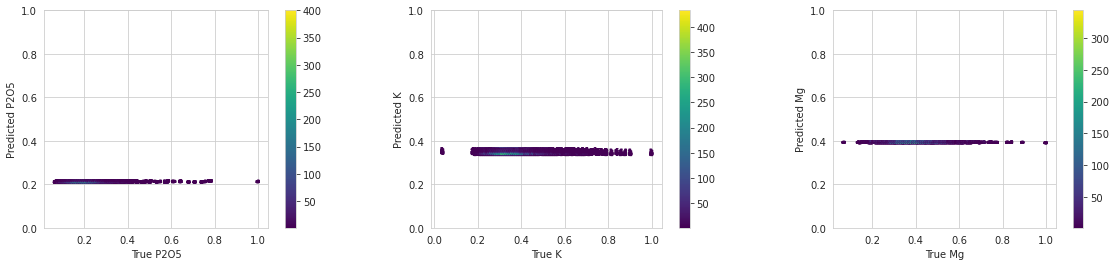

In [16]:
# ix 0: 0.9321552594721085
# ix 1: 
# ix 2: 0.8530452433725719
# ix 3: 0.7820406723958646
fig, axs = plt.subplots(1, 3, figsize=(20, 4))

for i, ax in enumerate(axs):
    ax.set_aspect('equal')

    img = ax.hexbin(y_vs_s[:, i], y_hat_rfs_s[:, i], cmap='viridis', mincnt=1)

    ax.plot(np.arange(np.min(y_vs_s[:, i]), np.max(y_vs_s[:, i])),
            np.arange(np.min(y_vs_s[:, i]), np.max(y_vs_s[:, i])), 'r--')

    plt.colorbar(img, ax=ax)

    ax.set_ylim([0,1])
    ax.set_xlabel('True ' + cols[i])
    ax.set_ylabel('Predicted ' + cols[i])

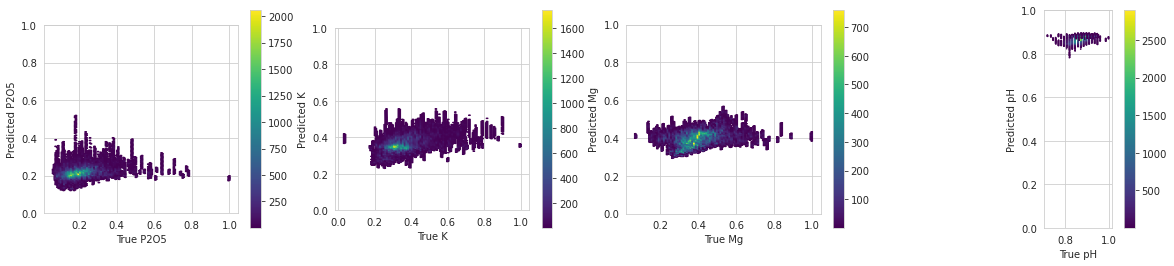

In [17]:
# all: 
fig, axs = plt.subplots(1, 4, figsize=(20, 4))

for i, ax in enumerate(axs):
    ax.set_aspect('equal')

    img = ax.hexbin(y_vs[:, i], y_hat_rfs[:, i], cmap='viridis', mincnt=1)

    ax.plot(np.arange(np.min(y_vs[:, i]), np.max(y_vs[:, i])),
            np.arange(np.min(y_vs[:, i]), np.max(y_vs[:, i])), 'r--')

    plt.colorbar(img, ax=ax)

    ax.set_ylim([0,1])
    ax.set_xlabel('True ' + cols[i])
    ax.set_ylabel('Predicted ' + cols[i])

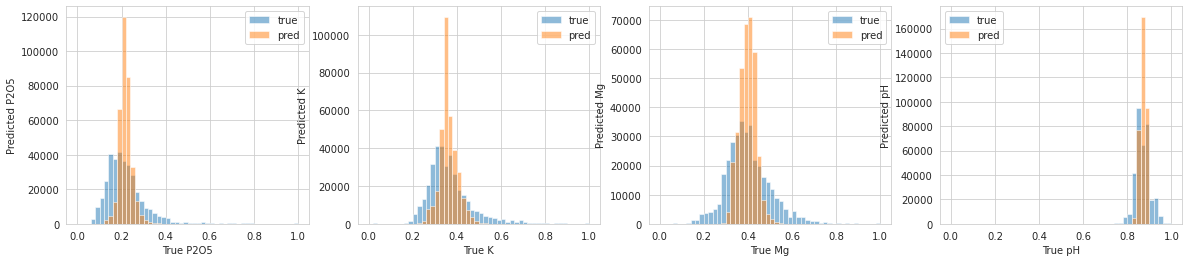

In [18]:
# ix all
fig, axs = plt.subplots(1, 4, figsize=(20, 4))

for i, ax in enumerate(axs):

    # Compute frequency and bins
    frequency, bins = np.histogram(y_vs[:,i], bins=50, range=[0, 1])
    ax.hist(y_vs[:, i], alpha=0.5, bins=bins, label='true')
    ax.hist(y_hat_rfs[:, i], alpha=0.5, bins=bins, label='pred')
    ax.legend()
    ax.set_xlabel('True ' + cols[i])
    ax.set_ylabel('Predicted ' + cols[i])

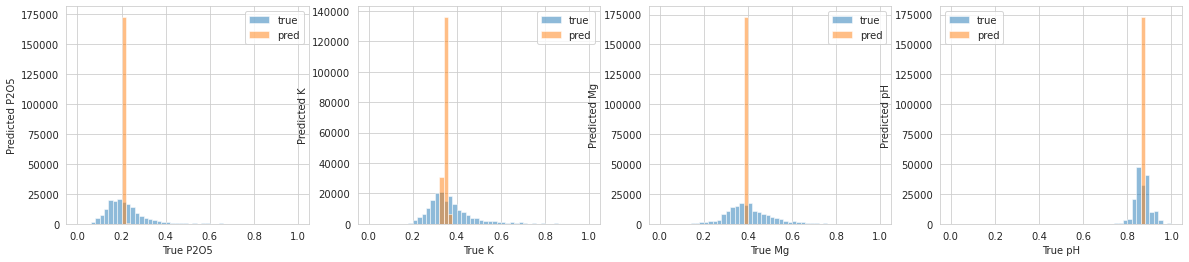

In [19]:
# ix single
fig, axs = plt.subplots(1, 4, figsize=(20, 4))

for i, ax in enumerate(axs):

    # Compute frequency and bins
    frequency, bins = np.histogram(y_vs_s[:,i], bins=50, range=[0, 1])
    ax.hist(y_vs_s[:, i], alpha=0.5, bins=bins, label='true')
    ax.hist(y_hat_rfs_s[:, i], alpha=0.5, bins=bins, label='pred')
    ax.legend()
    ax.set_xlabel('True ' + cols[i])
    ax.set_ylabel('Predicted ' + cols[i])